<a href="https://colab.research.google.com/github/atreGanesh15/Deep-Learning/blob/main/DL_ASS5_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Lab Assignment - LSTM

**Course Name:** Deep Learning ( PEC )

**Lab Title:** LSTM Lab Assignment

**Student Name:** Ganesh Atre

**Student ID:** 202201040068 ; **Roll No.:** 29   ;  **Div.:** DL 2

**Group Members**: Anirudha Gapat, Mayur Kapgate

# **Experiment 1:**
<br>**Objective:To forecast future values of a univariate time series using LSTM-based models.**<br>

**Dataset-link (Melbourne Daily Min Temp — Weather Dataset): https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv**



**Cell 1: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math

**Cell 2: Load and Display Dataset Info**

In [ ]:
# Load Dataset (Melbourne Daily Min Temp — Weather Dataset)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df[['Temp']]  # Using only the minimum daily temperature

# Dataset Summary
print("Dataset: Daily Minimum Temperatures – Melbourne")
print("Date Range:", df.index.min(), "to", df.index.max())
print("Total Records:", len(df))
df.head()

Dataset: Daily Minimum Temperatures – Melbourne
Date Range: 1981-01-01 00:00:00 to 1990-12-31 00:00:00
Total Records: 3650


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


**Cell 3: Normalize Data**

In [ ]:
# Normalize the temperature values
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

print("Data normalized using MinMaxScaler.")

Data normalized using MinMaxScaler.


**Cell 4: Create Sequences**

In [ ]:
# Function to create time series sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

# Set sequence length
seq_len = 30
X, y = create_sequences(data_scaled, seq_len)

print("Sequence length used for LSTM:", seq_len)
print("Input shape:", X.shape)

Sequence length used for LSTM: 30
Input shape: (3620, 30, 1)


**Cell 5: Train/Test Split**

In [ ]:
# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train/Test split ratio: 80/20")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Train/Test split ratio: 80/20
Training samples: 2896
Testing samples: 724


**Cell 6: Define and Compile LSTM Model**

In [ ]:
# Define LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print("LSTM Model Defined:")
print("LSTM units: 64")
print("Optimizer: Adam")
print("Loss function: MSE")

model.summary()

LSTM Model Defined:
LSTM units: 64
Optimizer: Adam
Loss function: MSE


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

**Cell 7: Train the Model**

In [ ]:
# Train LSTM model
epochs = 100
batch_size = 32
print(f"Training the model for {epochs} epochs with batch size {batch_size}...")

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

Training the model for 100 epochs with batch size 32...
Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0263 - val_loss: 0.0091
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0108 - val_loss: 0.0089
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - val_loss: 0.0088
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0109 - val_loss: 0.0083
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0101 - val_loss: 0.0081
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0103 - val_loss: 0.0079
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - val_loss: 0.0075
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 9/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0092 - val_loss: 0.0073
Epoch 10/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - val_loss: 0.0071
Epoch 11/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - val_loss: 0.0071
Epoch 

**Cell 8: Make Predictions**

In [ ]:
# Predict using the trained model
y_pred = model.predict(X_test)
print("Prediction complete.")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Prediction complete.


**Cell 9: Evaluate Performance**

In [ ]:
# Inverse scale
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate RMSE and MAE
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print(f"Evaluation Metrics:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")

Evaluation Metrics:
RMSE (Root Mean Squared Error): 2.20
MAE (Mean Absolute Error): 1.74


**Cell 10: Visualize Results**

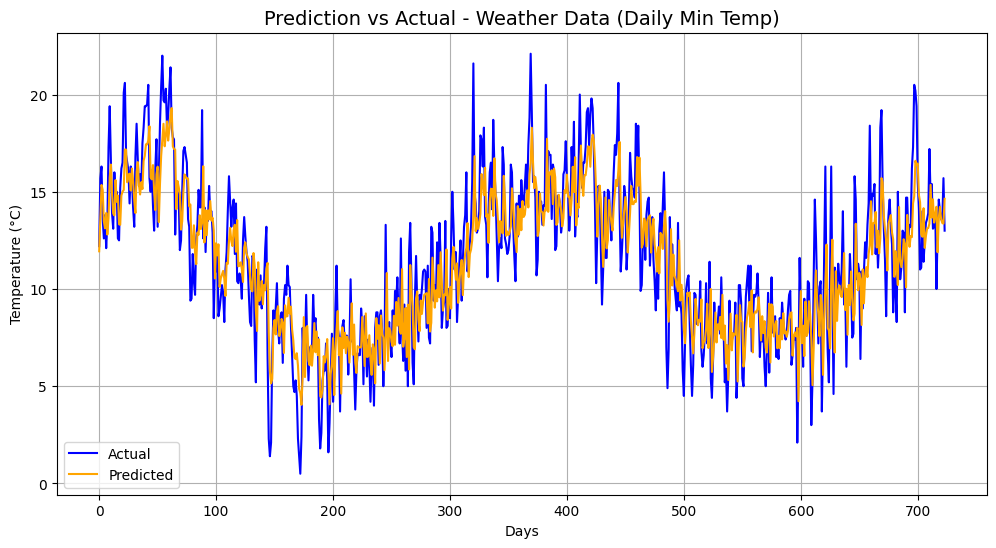

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='orange')
plt.title('Prediction vs Actual - Weather Data (Daily Min Temp)', fontsize=14)
plt.xlabel('Days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# **Experiment 2: Sequence Text Prediction using LSTM**

<br>**Objective:To generate next characters/words based on a given input sequence using LSTM.**<br>

**Dataset: Shakespeare’s Text (TensorFlow Datasets)**

**Step 1: Install Required Libraries**

In [ ]:
!pip install tensorflow

**Step 2: Load Dataset**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

# Load dataset without supervised mode
data, info = tfds.load("tiny_shakespeare", with_info=True)

# Read the full text
text_data = ""
for example in data['train']:
    text_data += example["text"].numpy().decode("utf-8")

print(f"Total characters in dataset: {len(text_data)}")
print(f"Sample text:\n{text_data[:500]}")


Total characters in dataset: 1003854
Sample text:
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


**Step 3: Text Preprocessing**

In [ ]:
# Create character-level vocabulary
vocab = sorted(set(text_data))
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# Vectorize text
text_as_int = np.array([char2idx[c] for c in text_data])

# Set sequence length
seq_length = 100
examples_per_epoch = len(text_data)//seq_length

# Create training sequences
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)


**Step 4: Create Batches**

In [ ]:
# Batch size and buffer for shuffling
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)


**Step 5: Build the LSTM Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input

model = Sequential([
    Input(shape=(None,)),  # Input shape defined here
    Embedding(vocab_size, embedding_dim),
    LSTM(rnn_units, return_sequences=True),
    Dense(vocab_size)
])

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, None, 256)      │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, None, 1024)     │     5,246,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, None, 65)       │        66,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,330,241 (20.33 MB)

 Trainable params: 5,330,241 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

**Step 6: Define Loss and Compile**

In [ ]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)


** Step 7: Train the Model**

In [ ]:
history = model.fit(dataset, epochs=10)
model.save_weights("shakespeare_model.weights.h5")  # ✅ Save weights after training


Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - loss: 2.8874
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - loss: 1.8626
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 1.5922
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - loss: 1.4531
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 1.3715
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - loss: 1.3102
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - loss: 1.2570
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - loss: 1.2106
Epoch 9/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 1.1677
Epoch 10/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 1.1235


**Step 8: Plot Training Loss**

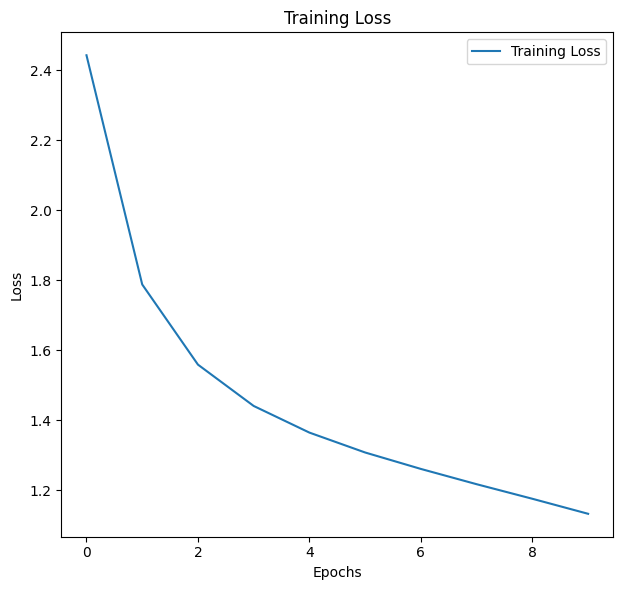

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()


**Step 9: Text Generation Function**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
import tensorflow as tf

# Build model with Input() layer that defines batch_input_shape
model = Sequential([
    Input(batch_shape=(1, None)),  # Define input shape here!
    Embedding(vocab_size, embedding_dim),
    LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),
    Dense(vocab_size)
])

# Load weights before text generation
model.load_weights("shakespeare_model.weights.h5")  # Use saved weights

# Model is already built with Input layer
# Now you can generate text

def generate_text(model, start_string):
    num_generate = 500
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    temperature = 0.5

    # Reset the states of the LSTM layer
    model.layers[1].reset_states()  # Reset states of LSTM layer (index 1)

    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    return start_string + ''.join(text_generated)

# Run the generation
print(generate_text(model, start_string="To be or not to be, "))


To be or not to be, but not a plague.

CAPULET:
Why, then a shall be come to see him that?

CLARENCE:
A day of the gates of men and that
Which they have breathed to death and mine.

KING EDWARD IV:
Thanks, madam, I do beseech your honour.

BUCKINGHAM:
Good morrow to the country.

MENENIUS:
Not to her hence,
And stand alone, as for the blood of means,
Which now the sense of heaven and the air
To see him plucked and my promise that
I know not for the country.

CAMILLO:
You would not stay.

DUKE VINCENTIO:
A word with


In [ ]:
print(generate_text(model, start_string="Once upon a time, "))


Once upon a time, her body's mouths of common measure of his
beasts; and all the world is dead, and hark'd out my friend,
And so shall be thy weary good,
And not before thy harm and hearts,
And hanging of the commons of her place.

JULIET:
I would not stay.

KING RICHARD III:
And you shall bear your pleasure and his head;
And then it is a person be the lady,
When he shall never heard the place expeals.

First Servingman:
Why, my gracious lord, I leave your tribunes,
That I may contract myself in the man.

BUCKING


In [ ]:
print(generate_text(model, start_string="In the heart of the jungle, "))


In the heart of the jungle, shall not stay with him,
And stay his person with a time of this
And as you so? What would I have some stranger stay
To make my shame to hear him than a pale-with
him.

Clown:
Come, my lord, the duke is done in any parting with
a barrant and on my heart.

First Lord:
What comfort, heavens!

DUKE VINCENTIO:
Not so here but breathed the lady of the course,
To make a feast of such a self-bath,
That it may stay it is the wars of men,
And so I speak a lady of my son,
That strain her as you are.

PRIN


# **Experiment 3: Sequence Text Classification using LSTM**

<br>**Objective:To classify text sequences (movie reviews) as positive or negative sentiment using an LSTM model.**<br>

**Dataset-Link (IMDb dataset):  https://www.tensorflow.org/datasets/catalog/imdb_reviews**

**Step 1: Install Required Libraries**

In [ ]:
!pip install seaborn

**Step 2: Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

**Step 3: Load IMDb Dataset**

In [ ]:
# Load top 10,000 words
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print("Training samples:", len(x_train))
print("Test samples:", len(x_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Test samples: 25000


**Step 4: Preprocess - Padding Sequences**

In [ ]:
# Padding to ensure equal input length
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (25000, 200)
x_test shape: (25000, 200)


**Step 5: Build LSTM Model**

In [ ]:
model = Sequential([
    Embedding(num_words, 100, input_length=maxlen),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Build the model before training
model.build(input_shape=(None, maxlen))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 200, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 200, 64)        │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056,833 (4.03 MB)

 Trainable params: 1,056,833 (4.03 MB)

 Non-trainable params: 0 (0.00 B)

**Step 6: Train the Model**

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5812 - loss: 0.6633 - val_accuracy: 0.7420 - val_loss: 0.5553
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7923 - loss: 0.4691 - val_accuracy: 0.7732 - val_loss: 0.4780
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8748 - loss: 0.3162 - val_accuracy: 0.8686 - val_loss: 0.3125
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9357 - loss: 0.1814 - val_accuracy: 0.8764 - val_loss: 0.3138
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9633 - loss: 0.1172 - val_accuracy: 0.8688 - val_loss: 0.3699
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9765 - loss: 0.0782 - val_accuracy: 0.8620 - val_loss: 0.3998
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9871 - loss: 0.0561 - val_accuracy: 0.8564 - val_loss: 0.5558
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9910 - loss: 0.0366 - 

**Step 7: Evaluate the Model**

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\n📊 Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8526 - loss: 0.7378

📊 Test Accuracy: 0.8515


**Step 8: Predictions and Classification Metrics**

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

📄 Classification Report:

              precision    recall  f1-score   support

           0     0.8684    0.8285    0.8480     12500
           1     0.8360    0.8745    0.8548     12500

    accuracy                         0.8515     25000
   macro avg     0.8522    0.8515    0.8514     25000
weighted avg     0.8522    0.8515    0.8514     25000



**Step 9: Confusion Matrix Visualization**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


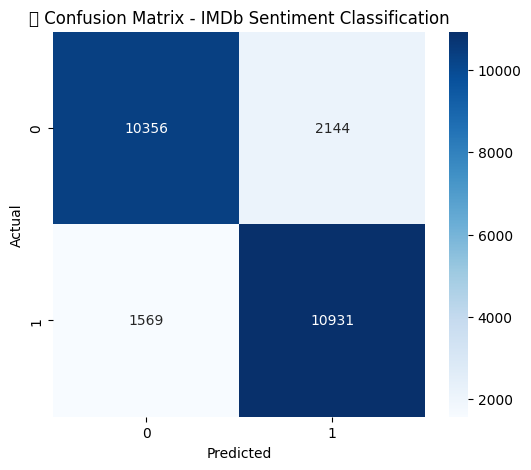

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix - IMDb Sentiment Classification")
plt.show()

# **Task 5 : Declaration**

I Ganesh Atre, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link:https://github.com/atreGanesh15/Deep-Learning/blob/edefd56d09d151ef150fbf2d2d51ce06b03f263a/DL_ASS5_LSTM.ipynb

Signature: Ganesh Maroti Atre